[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving mbti_1.csv to mbti_1 (1).csv
✅ File loaded successfully!

📊 Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.56      0.12      0.20        41
        ENFP       0.71      0.58      0.64       125
        ENTJ       0.79      0.34      0.48        44
        ENTP       0.68      0.52      0.59       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       1.00      0.13      0.24        15
        INFJ       0.64      0.68      0.66       288
        INFP       0.60      0.86      0.70       370
        INTJ       0.62      0.70      0.66       193
        INTP       0.63      0.79      0.70       293
        ISFJ       0.91      0.22      0.36        45
        ISFP       0.71      0.23      0.34        53
        ISTJ       0.71      0.23      0.34        44
        ISTP       0.69      0.37      0.49  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


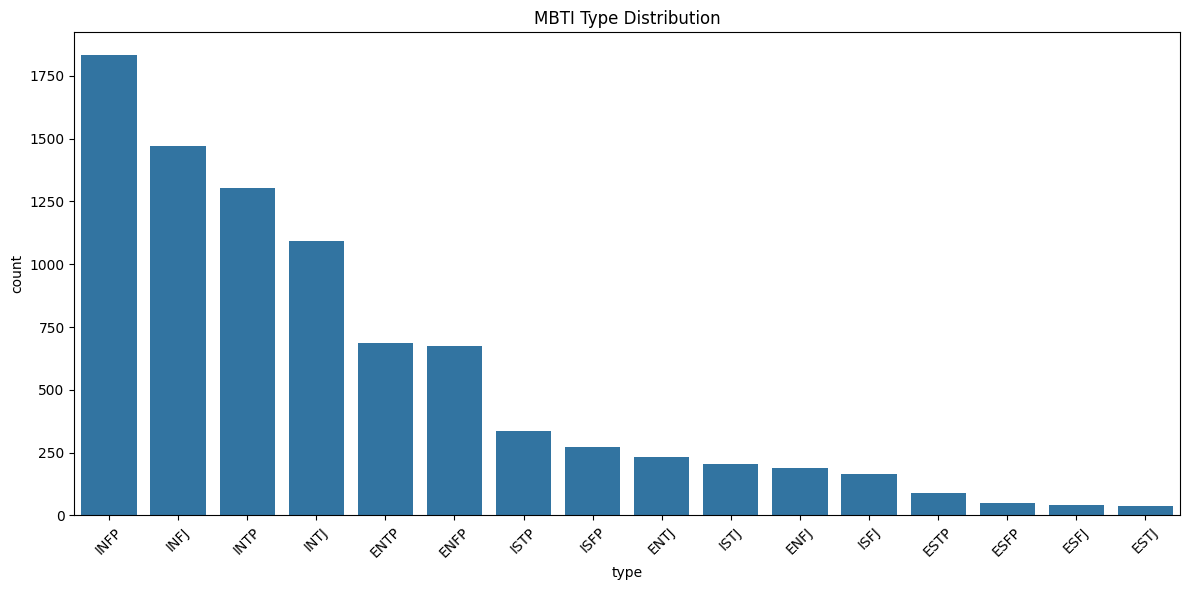

In [2]:
# MBTI Personality Prediction using NLP

import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
# from tkinter import Tk
# from tkinter.filedialog import askopenfilename

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


from google.colab import files
uploaded = files.upload()

# Load the uploaded dataset
df = pd.read_csv(next(iter(uploaded)))
df.head()
print(" File loaded successfully!")

# Step 2: Preprocess text
def clean_text(text):
    text = text.lower() # convert to lowercase
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"[^a-z\s]", "", text) # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text) # remove extra spaces
    return ' '.join(word for word in text.split() if word not in stop_words)

df['clean_posts'] = df['posts'].apply(clean_text)

# Step 3: Encode MBTI types
le = LabelEncoder()
df['label'] = le.fit_transform(df['type'])

# Step 4: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_posts']).toarray()
y = df['label']

# Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Predict and Evaluate
y_pred = model.predict(X_test)
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(f" Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Step 8: Predict Function for New Input
def predict_mbti(input_text):
    cleaned = clean_text(input_text)
    vector = tfidf.transform([cleaned])
    label = model.predict(vector)[0]
    return le.inverse_transform([label])[0]

# Test Prediction
sample = "I enjoy deep conversations about abstract topics and often reflect on my thoughts."
predicted_type = predict_mbti(sample)
print(f"\n🧠 Sample Prediction:\n\"{sample}\"\nPredicted MBTI Type: {predicted_type}")

# Step 9: Visualize MBTI Type Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.title("MBTI Type Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
# Test Prediction
sample = "I enjoy deep conversations about abstract topics and often reflect on my thoughts."
predicted_type = predict_mbti(sample)
print(f"\n🧠 Sample Prediction:\n\"{sample}\"\nPredicted MBTI Type: {predicted_type}")



🧠 Sample Prediction:
"I enjoy deep conversations about abstract topics and often reflect on my thoughts."
Predicted MBTI Type: INTP
